In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv').iloc[:,:].values
mnist

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [ ]:
y = mnist[:,0]
x = mnist[:,1:]
y

array([5, 7, 9, ..., 2, 9, 5])

In [ ]:
y_ = to_categorical(y)
print(y_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_.shape

(19999, 10)

In [ ]:
temp = x[2]
temp.shape

(784,)

In [ ]:
temp = temp.reshape(28,28)
temp.shape

(28, 28)

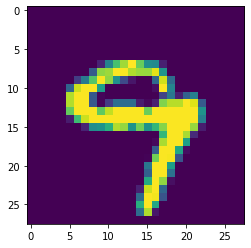

In [ ]:
plt.imshow(temp)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=784, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10,  activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3900      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 57,610
Trainable params: 57,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y_,shuffle = True, test_size = 0.1)

In [ ]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=30,batch_size =50)

Train on 17999 samples, validate on 2000 samples
Epoch 1/30
17999/17999 [==============================] - 1s 71us/step - loss: 2.2492 - accuracy: 0.6325 - val_loss: 0.6871 - val_accuracy: 0.8040
Epoch 2/30
17999/17999 [==============================] - 1s 51us/step - loss: 0.5107 - accuracy: 0.8510 - val_loss: 0.4853 - val_accuracy: 0.8610
Epoch 3/30
17999/17999 [==============================] - 1s 53us/step - loss: 0.3581 - accuracy: 0.8956 - val_loss: 0.4260 - val_accuracy: 0.8800
Epoch 4/30
17999/17999 [==============================] - 1s 52us/step - loss: 0.2742 - accuracy: 0.9206 - val_loss: 0.3704 - val_accuracy: 0.9025
Epoch 5/30
17999/17999 [==============================] - 1s 52us/step - loss: 0.2327 - accuracy: 0.9328 - val_loss: 0.3892 - val_accuracy: 0.9000
Epoch 6/30
17999/17999 [==============================] - 1s 52us/step - loss: 0.1983 - accuracy: 0.9422 - val_loss: 0.3299 - val_accuracy: 0.9145
Epoch 7/30
17999/17999 [==============================] - 1s 51us/ste

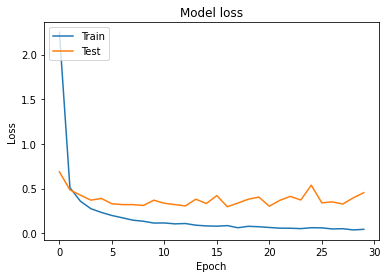

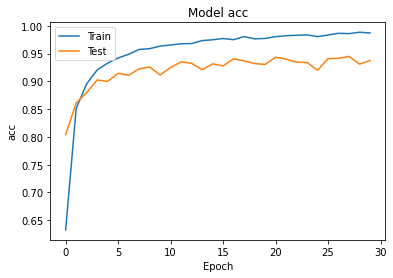

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('mnist_1_94.h5')

In [ ]:
all_img = []
for i in range(1,10):
  img1 = cv2.imread(str(i)+'.jpg',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (28,28)))

In [ ]:
all_img = np.array(all_img)

In [ ]:
temp = all_img[0].flatten()
temp = np.reshape(temp,(1,784))
model.predict(temp) 

array([[3.5413306e-03, 8.4271473e-01, 1.1079769e-02, 1.4661535e-02,
        8.4351115e-02, 2.5915056e-02, 1.4358634e-02, 2.6313483e-03,
        7.0064102e-04, 4.5895616e-05]], dtype=float32)

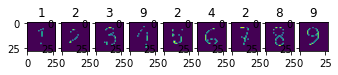

In [ ]:
for i in range(1,10):
  plt.subplot(1,10,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(1,784)))))